# Titanic: Machine Learning from Disaster
- https://www.kaggle.com/c/titanic
- Following this tutorial: https://www.kaggle.com/c/titanic/discussion/5105

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from patsy import dmatrices
from sklearn import datasets, svm
from KaggleAux import predict as ka

C:\Users\594031\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ModuleNotFoundError: No module named 'KaggleAux'

#### Read in data.

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop(['Cabin'],axis=1)
df = df.dropna()

In [6]:
# specify parameters of graphs
fig = plt.figure(figsize=(18,6), dpi=1600)
alpha = alpha_scatterplot = .2
alpha_bar_chart = .55

# allow several graphs on same output
ax1 = plt.subplot2grid((2,3),(0,0))
# plot bar graph of those who survived vs those who did not.
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# title the bar chart
plt.title("Distribution of Survival, (1=Survived)")

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# set y axis label
plt.ylabel("Age")
# format the grid line style of graphs
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age, (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
# plot an axis label
plt.xlabel("Age")
plt.title("Age Distribution within classes")
# Set legend for graph
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
plt.title("Passengers per boarding location");

### Exploratory Visualization
- Plot bar graph of those who survived vs those who did not.

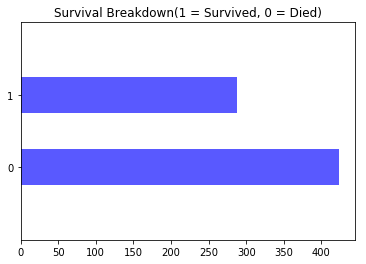

In [10]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color='blue', alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts()))
plt.title("Survival Breakdown(1 = Survived, 0 = Died)");

##### break down by gender.

(-1, 2)

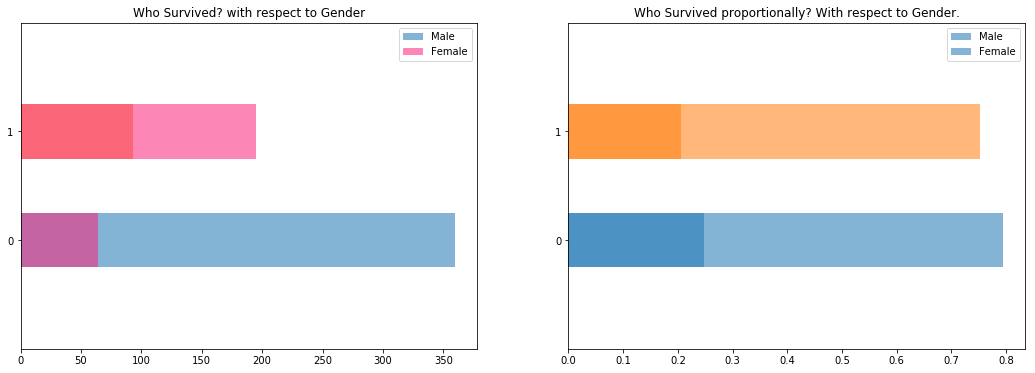

In [14]:
fig = plt.figure(figsize=(18,6))

# create a plot of two subsets, male and female
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh', label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379', label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender")
plt.legend(loc='best')
ax1.set_ylim(-1,2)

# adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh', label='Male', alpha=0.55)
(df_female/float(df_female.sum())).plot(kind='barh', label='Female', alpha=0.55)
plt.title("Who Survived proportionally? With respect to Gender.")
plt.legend(loc='best')
ax2.set_ylim(-1, 2)

##### While a higher number of men died, we can see that proportionally females had a greater survival rate.
- Next, break down by gender and the class they were travelling in.

In [21]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1 = fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass !=3].value_counts().sort_index()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Died", "Survived"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class")
plt.legend(loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts().sort_index()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died", "Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts().sort_index()
male_highclass.plot(kind='bar', label='male, high class', color='lightblue', alpha = alpha_level)
ax3.set_xticklabels(["Died", "Survived"], rotation=0)
ax3.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

ax4 = fig.add_subplot(144, sharey = ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts().sort_index()
male_lowclass.plot(kind='bar', label='male, low class', color='steelblue', alpha=alpha_level)
ax4.set_xticklabels(["Died", "Survived"], rotation=0)
ax4.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

## Supervised Machine Learning
#### Logistic Regression

In [22]:
# model formula
# ~ sign is =
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'

# results dictionary to hold regression results
results = {}

In [26]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# create regression friendly dataframe using patsy's dmatrices function
y, x = dmatrices(formula, data=df, return_type='dataframe')

# instantiate model
model = sm.Logit(y, x)

# Fit model to training data
res = model.fit()

# save the result for outputting predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Jul 2018   Pseudo R-squ.:                  0.3414
Time:                        12:44:46   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000       3.613       5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000      -1.852      -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000      -3.078      -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000      -3.050      -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162      -2.006       0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116      -0.956       0.105
Age                 -0.0436      0.008     -5.264      0.000      -0.060      -0.027
SibSp               -0.3697      0.123     -3.004      0.003      -0.611      -0.129
====================================================================================
"""

C:\Users\594031\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Logit Residuals')

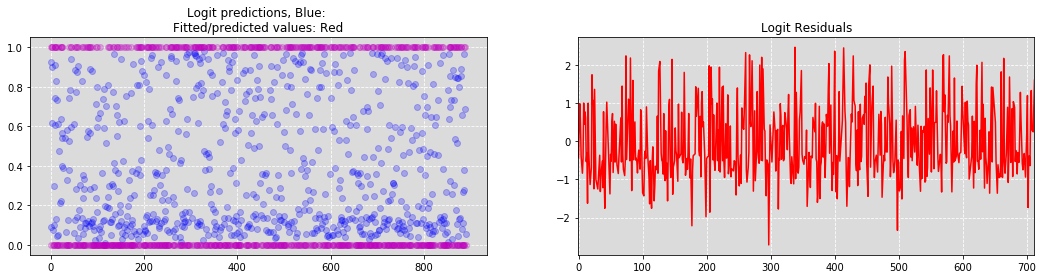

In [27]:
# Plot Predictions Vs Actual
plt.figure(figsize = (18,4))
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25)
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red')

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals')

#### Interperet the results to see how well this worked

In [ ]:
fig = plt.figure(figsize=(18, 9), dpi=1600)
a = .2

fig.add_subplot(221, axisbg="#DBDBDB")
kde_res = KDEUnivariate(res.predict())